In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date, timedelta
import seaborn as sns
from pandas.api.types import is_numeric_dtype
import yfinance as yf

sys.path.append( '/Users/bhundt/Documents/01 Basti/Interessen/Programmieren/FinDat/' )
from src.analysis.sentiment_analysis import get_sentiment

# Load S&P 500 Benchmark and VIX-Data

In [13]:
sp500 = yf.Ticker('^GSPC')
hist_sp500 = sp500.history(period='max', interval='1d')

vix = yf.Ticker('^VIX')
hist_vix = vix.history(period='max', interval='1d')

vix3m = yf.Ticker('^VIX3M')
hist_vix3m = vix3m.history(period='max', interval='1d')

hist_sp500 = hist_sp500.reset_index()
hist_sp500['Date'] = pd.to_datetime(hist_sp500['Date'])
hist_vix = hist_vix.reset_index()
hist_vix['Date'] = pd.to_datetime(hist_vix['Date'])
hist_vix3m = hist_vix3m.reset_index()
hist_vix3m['Date'] = pd.to_datetime(hist_vix3m['Date'])

df = hist_sp500[['Date', 'Close']].merge(hist_vix[['Date', 'Close']], how='left', on='Date')
df = df.merge(hist_vix3m[['Date', 'Close']], how='left', on='Date')
df = df.reset_index(drop=True)
df.Date = pd.to_datetime(df.Date)
df = df.rename(columns={'Close_x':'S&P500', 'Close_y':'VIX', 'Close':'VIX3M'})

In [17]:
df = df[df.Date > pd.to_datetime('2006-07-17')]

In [28]:
df = df[(df.VIX3M.isna() == False) & (df.VIX.isna() == False)]

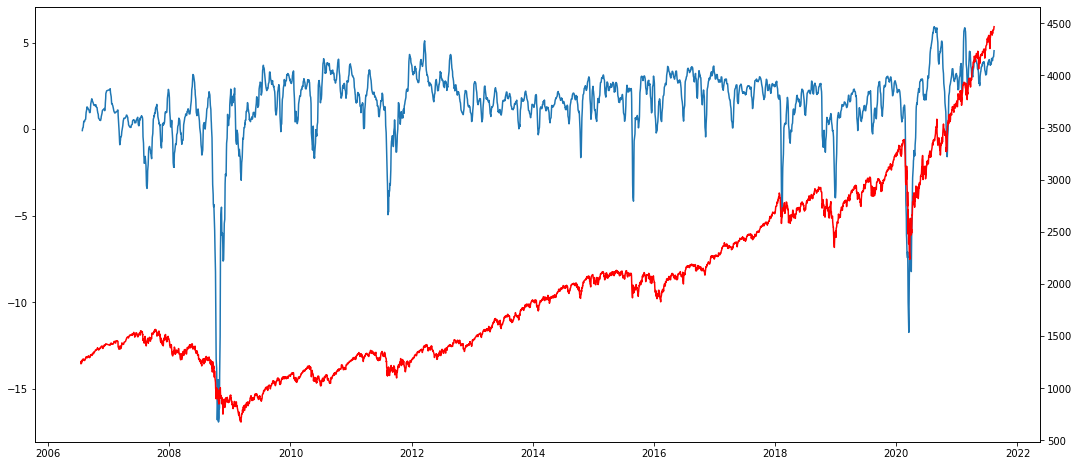

In [59]:
fig = plt.figure(figsize=(18, 8))
ax = fig.gca()
plt.plot(df.Date, (df.VIX3M - df.VIX).rolling(7).mean())

ax2 = ax.twinx()
plt.plot(df.Date, df['S&P500'], 'r')

# Find zero crossings of VIX_3M/VIX

In [68]:
a = (df.VIX3M - df.VIX + 2).rolling(7).mean()
zero_crossings = np.where(np.diff(np.signbit(a)))[0]
print(df.iloc[zero_crossings])

            Date       S&P500        VIX      VIX3M
16133 2007-08-10  1453.640015  28.299999  25.400000
16144 2007-08-27  1466.790039  22.719999  21.420000
16248 2008-01-25  1330.609985  29.080000  26.860001
16251 2008-01-30  1355.810059  27.620001  26.080000
16410 2008-09-16  1213.599976  30.299999  26.879999
16469 2008-12-09   888.669983  58.910000  57.770000
16526 2009-03-04   712.869995  47.560001  44.720001
16532 2009-03-12   750.739990  41.180000  40.700001
17138 2011-08-05  1199.380005  32.000000  29.590000
17154 2011-08-29  1210.079956  32.279999  31.980000
18156 2015-08-24  1893.209961  40.740002  31.139999
18163 2015-09-02  1948.859985  26.090000  26.190001
18774 2018-02-06  2695.139893  29.980000  23.750000
18782 2018-02-16  2732.219971  19.459999  19.170000
18995 2018-12-21  2416.620117  30.110001  26.230000
19003 2019-01-04  2531.939941  21.379999  21.860001
19290 2020-02-26  3116.389893  27.559999  23.700001
19322 2020-04-13  2761.629883  41.169998  39.970001
